In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!pip install chart-studio

     |████████████████████████████████| 71kB 2.0MB/s 


In [ ]:
#importing all libraries
import matplotlib.pyplot as plt
from keras.preprocessing.sequence import pad_sequences
import os
import re
import numpy as np
import pandas as pd
import chart_studio.plotly as py
import plotly.graph_objs as go
import itertools
from scipy import stats
from ast import literal_eval
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



In [ ]:
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Embedding, LSTM, Input, Activation, GlobalAveragePooling1D, Flatten, Concatenate, Conv1D, MaxPooling1D,Bidirectional,TimeDistributed
from keras.layers.normalization import BatchNormalization
from keras.layers.merge import concatenate
from keras.optimizers import SGD, RMSprop, Adagrad, Adam
from keras.preprocessing.text import one_hot, text_to_word_sequence, Tokenizer
from keras.preprocessing.sequence import pad_sequences

from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.utils.vis_utils import plot_model

import fnmatch

import warnings

import string
from pathlib import Path
from random import shuffle
from ast import literal_eval

warnings.filterwarnings('ignore')

In [ ]:
!pip install nltk
import nltk

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

from nltk.stem.wordnet import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import gensim
import json


import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from keras.preprocessing.text import Tokenizer
from keras.utils.vis_utils import plot_model
import keras.utils
from keras import utils as np_utils

#Keras Tokenizer just replaces certain punctuation characters and splits on the remaining space character.
#NLTK Tokenizer uses the Treebank tokenizer uses regular expressions to tokenize text as in Penn Treebank. 

In [ ]:
WINDOWS_SIZE = 10
labels=['none','mild','moderate','moderately severe', 'severe']
num_classes = len(labels)

In [ ]:
def transcripts_to_dataframe(directory):
    rows_list = []
        
    filenames = os.listdir(directory)
    
    if ".DS_Store" in filenames:
        filenames.remove(".DS_Store")
        
    for filename in filenames:
        transcript_path = os.path.join(directory, filename)
        transcript = pd.read_csv(transcript_path, sep='\t')
        m = re.search("(\d{3})_TRANSCRIPT.csv", filename)
        if m:
            person_id = m.group(1)
            p = {}
            question = ""
            answer = ""
            lines = len(transcript)
            for i in range(0, lines):
                row = transcript.iloc[i]
                if (row["speaker"] == "Ellie") or (i == lines - 1):
                    p["personId"] = person_id
                    if "(" in str(question):
                        question = question[question.index("(") + 1:question.index(")")]
                    p["question"] = question
                    p["answer"] = answer
                    if question != "":
                        rows_list.append(p)
                    p = {}
                    answer = ""
                    question = row["value"]
                else:
                    answer = str(answer) + " " + str(row["value"])

    all_participants = pd.DataFrame(rows_list, columns=['personId', 'question', 'answer'])
    all_participants.to_csv(directory + 'all.csv', sep=',')
    print("File was created")
    return all_participants

In [ ]:
#loading the data
data_path = "/content/drive/My Drive/transcripts/"
all_participants = transcripts_to_dataframe(data_path)

File was created


In [ ]:
all_participants.head(20)

,personId,question,answer
0,300,hi i'm ellie thanks for coming in today,
1,300,i was created to talk to people in a safe and ...,
2,300,think of me as a friend i don't judge i can't ...,
3,300,i'm here to learn about people and would love ...,
4,300,i'll ask a few questions to get us started and...,
5,300,how are you doing today,good
6,300,that's good,
7,300,where are you from originally,atlanta georgia
8,300,really,
9,300,why'd you move to l_a,um my parents are from here um


In [ ]:
#https://www.kaggle.com/currie32/the-importance-of-cleaning-text

def text_to_wordlist(text, remove_stopwords=True, stem_words=False):    
    # Clean the text, with the option to remove stopwords and to stem words.
    
    # Convert words to lower case and split them
    text = text.lower().split()

    # Optionally, remove stop words
    if remove_stopwords:
        stops = stopwords.words("english")
        text = [wordnet_lemmatizer.lemmatize(w) for w in text if not w in stops ]
        text = [w for w in text if w != "nan" ]
    else:
        text = [wordnet_lemmatizer.lemmatize(w) for w in text]
        text = [w for w in text if w != "nan" ]
    
    text = " ".join(text)

    # Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "cannot ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    
    text = re.sub(r"\<", " ", text)
    text = re.sub(r"\>", " ", text)
    
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    
    # Optionally, shorten words to their stems
    if stem_words:
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = " ".join(stemmed_words)
    
    # Return a list of words
    return(text)

In [ ]:
#creating a corpus with the words from the answers without stopwords given by the patients
all_participants_mix = all_participants.copy() # However, if you need the original list unchanged when the new list is modified, you can use copy() method. This is called shallow copy.
all_participants_mix['answer'] = all_participants_mix.apply(lambda row: text_to_wordlist(row.answer).split(), axis=1)

In [ ]:
##creating a corpus with the words from the answers withstopwords given by the patients
# stopwords are ={what is , have,}
all_participants_mix_stopwords = all_participants.copy()
all_participants_mix_stopwords['answer'] = all_participants_mix_stopwords.apply(lambda row: text_to_wordlist(row.answer, remove_stopwords=False).split(), axis=1)


In [ ]:
words = [w for w in all_participants_mix['answer'].tolist()]
words = set(itertools.chain(*words)) #chain('ABC', 'DEF') --> A B C D E F
vocab_size = len(words)

In [ ]:
words

{'applies',
 'sporadic',
 'mis',
 'dropped',
 'freeing',
 'br',
 'prescribed',
 'yo',
 'leaf',
 'celebration',
 'umbilical',
 'authentic',
 'public',
 'oriented',
 'requirement',
 'staple',
 'royal',
 'almost',
 'desk',
 'king',
 'night',
 'wishing',
 'educated',
 'he',
 'technique',
 'unless',
 'encouraged',
 'carolina',
 'coat',
 'miami',
 'researching',
 'among',
 'psychotherapy',
 'lipstick',
 'angry',
 'luh',
 'northeast',
 'main',
 'nigger',
 'achieving',
 'being',
 'dive',
 'agitate',
 'dealt',
 'resurfacing',
 'lasting',
 'large',
 'barrier',
 'willpower',
 'sophie',
 'nervousness',
 'website',
 'stipend',
 'switch',
 'smoother',
 'grad',
 'grew',
 'entrance',
 'sharply',
 'grown',
 'cold',
 'formula',
 'rejection',
 'noticed',
 'judgement',
 'broadside',
 'hop',
 'afro',
 'dar',
 'toe',
 'exception',
 'misread',
 'cane',
 'generation',
 'medicated',
 'colorful',
 'b',
 'actively',
 'girlfriend',
 'chorazine',
 'eats',
 'controlling',
 'extent',
 'insomnia',
 'meant',
 'quarter

In [ ]:
words_stop = [w for w in all_participants_mix_stopwords['answer'].tolist()]
words_stop = set(itertools.chain(*words_stop))
vocab_size_stop = len(words_stop)

In [ ]:
words_stop

{'applies',
 'sporadic',
 'mis',
 'dropped',
 'freeing',
 'br',
 'prescribed',
 'yo',
 'leaf',
 'celebration',
 'umbilical',
 'authentic',
 'public',
 'oriented',
 'requirement',
 'staple',
 'royal',
 'almost',
 'desk',
 'king',
 'night',
 'wishing',
 'educated',
 'he',
 'technique',
 'unless',
 'encouraged',
 'carolina',
 'coat',
 'miami',
 'researching',
 'among',
 'psychotherapy',
 'lipstick',
 'angry',
 'luh',
 'northeast',
 'main',
 'nigger',
 'achieving',
 'being',
 'dive',
 'agitate',
 'dealt',
 'resurfacing',
 'ourselves',
 'lasting',
 'large',
 'barrier',
 'willpower',
 'sophie',
 'nervousness',
 'website',
 'stipend',
 'switch',
 'smoother',
 'grad',
 'grew',
 'entrance',
 'sharply',
 'grown',
 'cold',
 'formula',
 'rejection',
 'noticed',
 'judgement',
 'broadside',
 'hop',
 'afro',
 'dar',
 'toe',
 'exception',
 'misread',
 'cane',
 'generation',
 'medicated',
 'colorful',
 'b',
 'actively',
 'girlfriend',
 'chorazine',
 'eats',
 'controlling',
 'extent',
 'insomnia',
 'mea

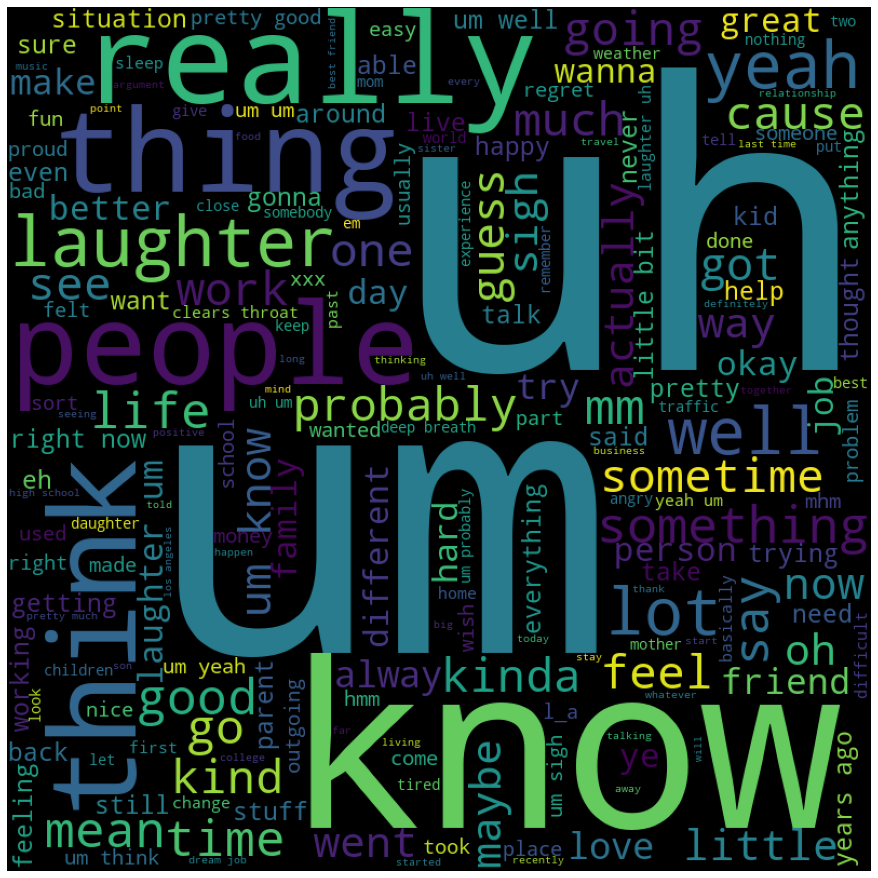

In [ ]:
#wordcloud used to represent the important words based on frequency

# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  
# iterate through the csv mifile 
for val in all_participants['answer'].values: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (12, 12), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

### Unigram of the top 20 frequent words

um 7058
uh 5360
know 3575
like 3495
just 3169
don 1934
really 1803
laughter 1501
yeah 1281
ve 1273
think 1237
people 1167
good 1113
things 1054
lot 923
time 889
pretty 717
sigh 666
probably 632
life 596
little 594
feel 581
say 565
mm 565
guess 550
mean 538
years 527
different 504
yes 491
going 490
kinda 489
oh 450
right 443
didn 441
cause 434
went 412
hard 399
got 395
kind 389
work 389


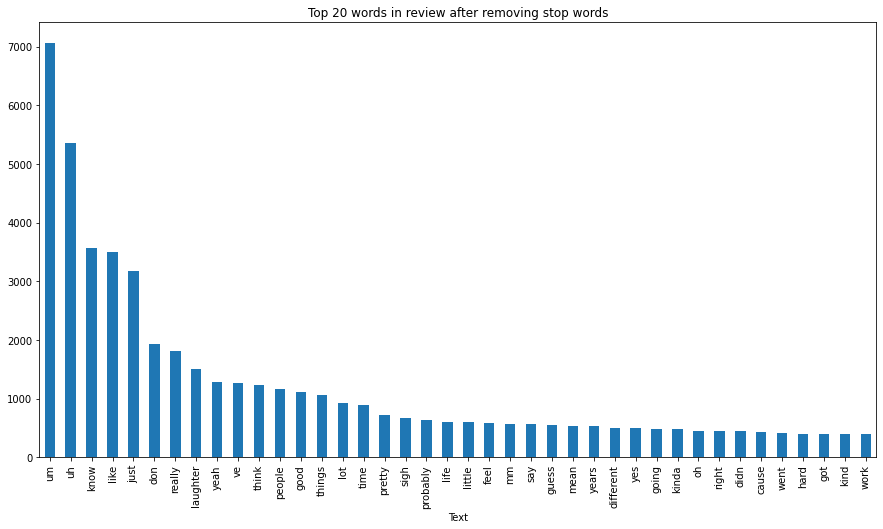

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
#The distribution of top unigrams

def get_top_n_words(corpus, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_words(all_participants['answer'].dropna(), 40)

for word, freq in common_words:
    print(word, freq)
df2 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df2.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 words in review after removing stop words',figsize=(15,8))

### Bigram of the top 20 frequent words

don know 601
um just 311
um uh 284
um know 257
uh uh 246
know just 225
years ago 214
um don 212
little bit 205
pretty good 180
just like 176
um like 172
uh just 170
feel like 170
uh know 165
don really 165
um sigh 146
know like 144
um yeah 143
clears throat 143
um think 141
um um 137
know um 134
don like 126
um really 126
uh don 125
just uh 124
laughter um 123
deep breath 123
like know 119
uh like 118
like um 114
know uh 114
things like 113
um probably 110
uh um 107
don think 104
just know 102
like uh 102
um ve 101


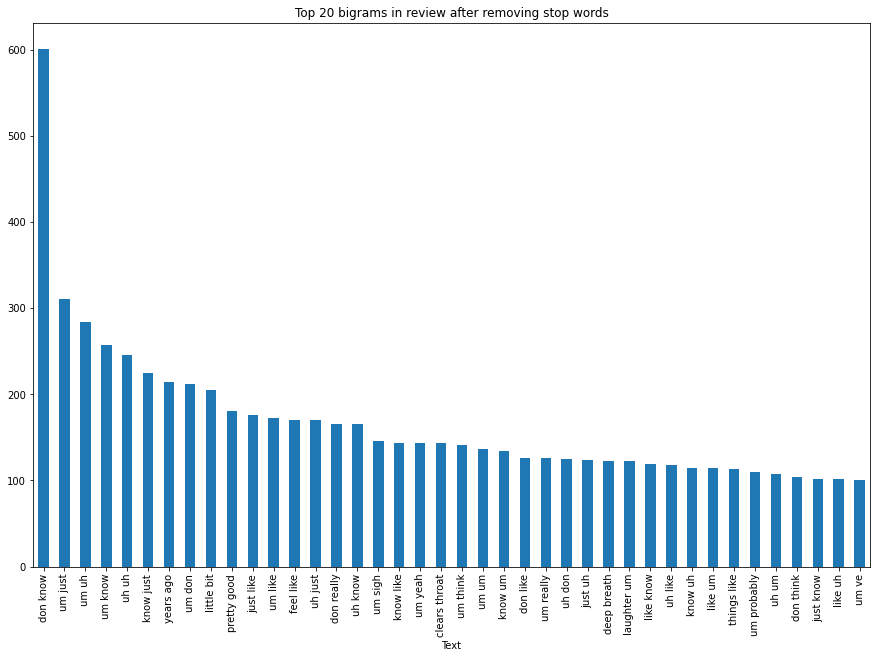

In [ ]:
# The distribution of top bigrams

def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(all_participants['answer'].dropna(), 40)

for word, freq in common_words:
    print(word, freq)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams in review after removing stop words',figsize = (15,10))

### Trigram of the top 20  frequent words

um don know 106
uh don know 53
don know just 49
don know don 29
don know um 27
meeting new people 26
don know really 25
just don know 24
don know laughter 24
don know guess 23
felt really happy 23
deep breath um 23
years ago um 21
time felt really 21
um just uh 20
know don know 19
good night sleep 19
deep breath sigh 19
don know uh 18
um years ago 18
um clears throat 18
really don know 17
hardest decision ve 17
decision ve make 17
nan nan nan 17
los angeles california 16
uh just uh 16
um know uh 16
just know just 16
laughter don know 16
um pretty good 16
good controlling temper 16
um yeah just 16
uh uh uh 16
um don like 15
mm don know 15
sigh don know 15
um know just 15
long time ago 15
couple days ago 14


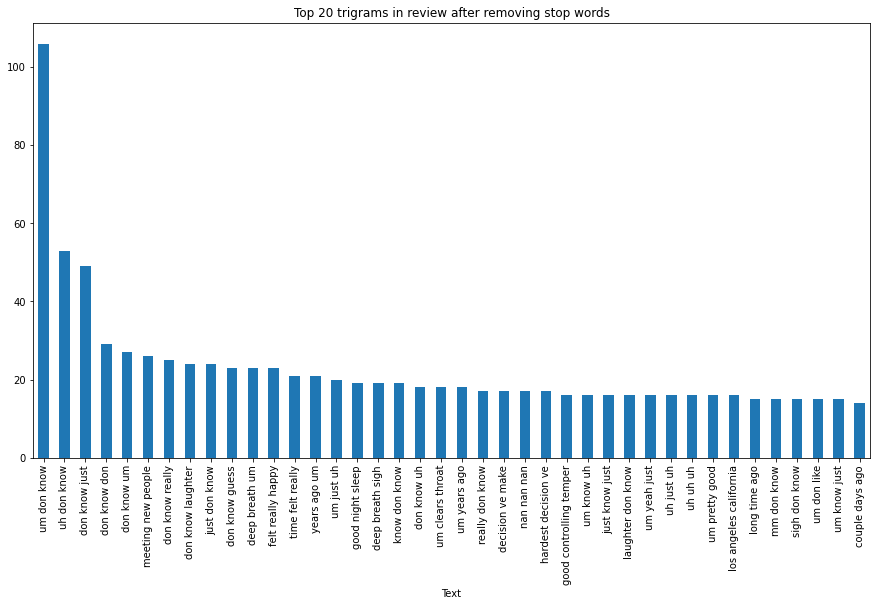

In [ ]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_trigram(all_participants['answer'].dropna(), 40)
for word, freq in common_words:
    print(word, freq)
df6 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df6.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 trigrams in review after removing stop words',figsize=(15,8))

In [ ]:
def load_avec_dataset_file(path,score_column):
    ds = pd.read_csv(path, sep=',')
    ds['level'] = pd.cut(ds[score_column], bins=[-1,0,5,10,15,25], labels=[0,1,2,3,4])  #cut function used to segregate array into bins 5 levels - 'none','mild','moderate','moderately severe', 'severe'
    ds['PHQ8_Score'] = ds[score_column]
    ds['cat_level'] = keras.utils.to_categorical(ds['level'], num_classes).tolist() #categorical levels 
    ds = ds[['Participant_ID', 'level', 'cat_level', 'PHQ8_Score','Gender']] 
    ds = ds.astype({"Participant_ID": float, "level": int, 'PHQ8_Score': int})
    return ds

In [ ]:
train = load_avec_dataset_file('/content/drive/My Drive/Depression_detect/train_split_Depression_AVEC2017 (1).csv','PHQ8_Score')
dev = load_avec_dataset_file('/content/drive/My Drive/Depression_detect/dev_split_Depression_AVEC2017.csv','PHQ8_Score')
test = load_avec_dataset_file('/content/drive/My Drive/Depression_detect/full_test_split.csv','PHQ8_Score')
print("Size: train= {}, dev= {}, test={}".format(len(train), len(dev), len(test)))
train.head()

Size: train= 107, dev= 35, test=47


,Participant_ID,level,cat_level,PHQ8_Score,Gender
0,303.0,0,"[1.0, 0.0, 0.0, 0.0, 0.0]",0,0
1,304.0,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",6,0
2,305.0,2,"[0.0, 0.0, 1.0, 0.0, 0.0]",7,1
3,310.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",4,1
4,312.0,1,"[0.0, 1.0, 0.0, 0.0, 0.0]",2,1


### Participants with PHQ SCORES

In [ ]:
## Import data visualization packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
ds_total = pd.concat([dev,train,test])
total_phq8 = len(ds_total)
print("Total size = {}".format(total_phq8))

Total size = 189


### Number of Participants with differnt PHQ Scores

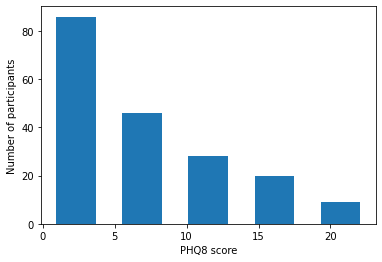

<Figure size 432x288 with 0 Axes>

In [ ]:
bins=[-1,0,5,10,15,25]
plt.figure()
plt.hist(ds_total["PHQ8_Score"], rwidth=0.6, bins=5)
plt.xlabel('PHQ8 score')
plt.ylabel('Number of participants')
plt.show()
plt.savefig('/content/drive/My Drive/Depression_detect/bins.png')

### Gender distribution for differnt levels of depression


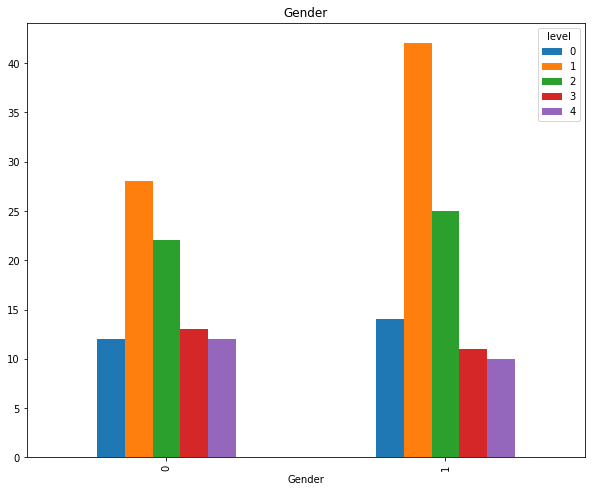

In [ ]:
pd.crosstab(ds_total.Gender, ds_total.level).plot(kind="bar", figsize=(10, 8), title="Gender");
plt.plot();

In [ ]:
transcript_time = pd.read_csv('/content/drive/My Drive/time.csv')